<a href="https://colab.research.google.com/github/Abhijeetnarone/Banglow_price_prediction-Banglore-/blob/main/Sentiment_Analysis_in_Machine_Learning_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer

In [8]:
df = pd.read_csv('Train.csv')
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [21]:
df.shape

(40000, 2)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [23]:
df.isnull().sum()

text     0
label    0
dtype: int64

After reading the dataset which contains 40k movie reviews from IMDB, we see that there are two prominent columns. One being TEXT which contains the criticism and the other being LABEL which contains the O’s and 1’s, where 0-NEGATIVE and 1-POSITIVE.

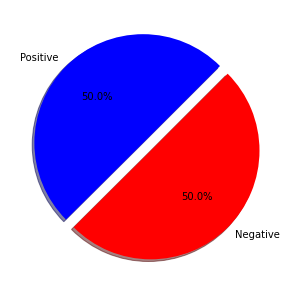

In [9]:
fig=plt.figure(figsize=(5,5))
colors=['blue','red']
pos = df[df['label']==1]
neg = df[df['label']==0]
ck = [pos['label'].count(),neg['label'].count()]
legpie = plt.pie(ck,labels=['Positive','Negative'],
                autopct = '%1.1f%%',
                shadow = True,
                colors = colors,
                startangle = 45,
                explode=(0, 0.1))

Then we will import RE, that is, the regular expression operation, we use this library to remove html tags like '< a >' or. So whenever we come across these tags, we replace them with an empty string. Then we will also modify the emojis/emoticons which can be smileys :), a sad face: (or even an upset face: /. We will change the emojis towards the end to get a clean set of text:

In [10]:
import re
def preprocessor(text):
             text=re.sub('<[^>]*>','',text)
             emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
             text=re.sub('[\W]+',' ',text.lower()) +\
                ' '.join(emojis).replace('-','')
             return text   
df['text']=df['text'].apply(preprocessor)

Now, I’ll be using nltk’s PorterStemmer to simplify the data and remove unnecessary complexities in our text data:

In [11]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
def tokenizer(text):
    return text.split()
def tokenizer_porter(text):
    return[porter.stem(word) for word in text.split()]

# Visualizing Negative and Positive Words
### To visualzie the negative and postive words using a wordcloud, I will first remove the stopwords:

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
from wordcloud import WordCloud

positivedata = df[df['label']==1]
positivedata = positivedata['text']
negdata = df[df['label']==0]
negdata=negdata['text']

Positive words are as follows


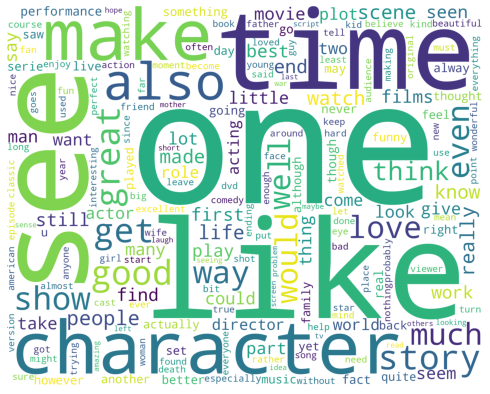

Negative words are as follows


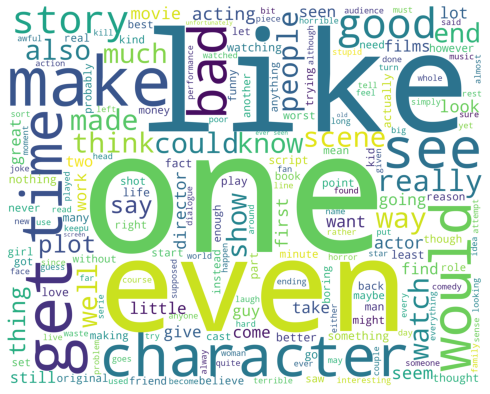

In [14]:
def wordcloud_draw(df, color = 'white'):
    words = ' '.join(df)
    cleaned_word = " ".join([word for word in words.split()
                              if(word!='movie' and word!='film')
                            ])
    wordcloud = WordCloud(stopwords=stop,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words are as follows")
wordcloud_draw(positivedata,'white')
print("Negative words are as follows")
wordcloud_draw(negdata)

The positive words that are highlighted are love, excellent, perfect, good, beautiful, kind, excellent and The negative words that are highlighted are: horrible, wasteful, problem, stupid, horrible, bad, poor.

Now I will use the TF-IDF Vertorizer to convert the raw documents into feature matrix which is very important to train a Machine Learning model:

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,tokenizer=tokenizer_porter,use_idf=True,norm='l2',smooth_idf=True)
y=df.label.values
x=tfidf.fit_transform(df.text)

# Training Machine Learning Model for Sentiment Analysis

Now to train a machine learning model I will split the data into 50 percent training and 50 percent test sets:

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)

Now let’s train a machine learning model for the task of sentiment analysis by using the Logistic Regression model:

In [19]:
from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  3.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  3.5min finished


Accuracy: 0.89045
